# Feature Importance using Ensemble Classifiers

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [7]:
# Feature importance
import numpy as np
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X.shape
y.shape
X[0:5,:]
y[0:10]

(12000, 10)

(12000,)

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
         0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
        -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
         0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
        -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028]])

array([ 1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1.])

In [8]:
clf = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,
                                max_depth=2,random_state=0).fit(X,y)
clf.feature_importances_

array([0.10909633, 0.10391111, 0.1133277 , 0.09810207, 0.10060279,
       0.10514883, 0.09198521, 0.09682167, 0.09441205, 0.08659223])

# Partial dependence plot

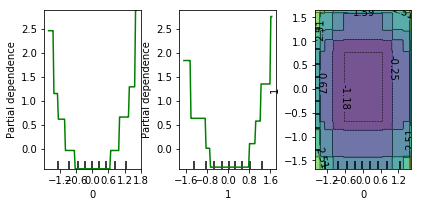

In [9]:
#Partial dependence plots (PDP) show the dependence between the target response and a set of ‘target’ features, 
#marginalizing over the values of all other features (the ‘complement’ features).

#read more about PDPs here: https://www.kaggle.com/dansbecker/partial-dependence-plots 
#and http://scikit-learn.org/stable/auto_examples/ensemble/plot_partial_dependence.html

#One-way PDPs tell us about the interaction between the target response and the target feature (e.g. linear, non-linear).
#PDPs with two target features show the interactions among the two features.
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence

X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,
                                max_depth=1,random_state=0).fit(X, y)
#show 1-way PDP for feature 0, 1-way PDP for feature 1, 2-way PDP for features 0 and 1 combined.
features = [0, 1, (0, 1)]
fig, axs = plot_partial_dependence(clf, X, features)

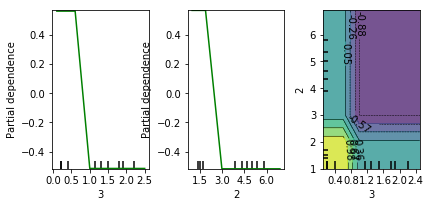

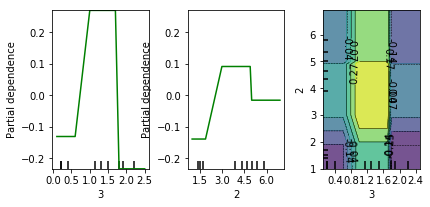

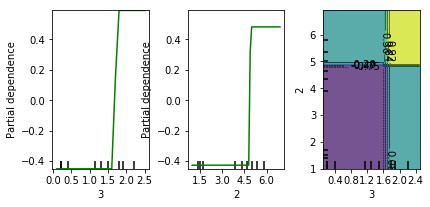

In [10]:
#For multi-class models, you need to set the class label for which the PDPs should be created via the label argument:
from sklearn.datasets import load_iris
iris = load_iris()
mc_clf = GradientBoostingClassifier(n_estimators=10,
    max_depth=1).fit(iris.data, iris.target)
features = [3, 2, (3, 2)]
fig, axs = plot_partial_dependence(mc_clf, iris.data, features, label=0) 
fig, axs = plot_partial_dependence(mc_clf, iris.data, features, label=1) 
fig, axs = plot_partial_dependence(mc_clf, iris.data, features, label=2) 

In [18]:
# If you need the raw value of the partial dependence function rahter than the plot you can use the partial_dependence function
from sklearn.ensemble.partial_dependence import partial_dependence
pdp_raw_value , pdp_axes = partial_dependence(clf, [0],X=X)
pdp_raw_value
pdp_axes

array([[ 2.46643157,  2.46643157,  2.46643157,  2.46643157,  2.46643157,
         2.46643157,  1.15418258,  1.15418258,  1.15418258,  1.15418258,
         1.15418258,  0.61847569,  0.61847569,  0.61847569,  0.61847569,
         0.61847569,  0.61847569,  0.61847569,  0.61847569, -0.03524098,
        -0.03524098, -0.03524098, -0.03524098, -0.03524098, -0.03524098,
        -0.03524098, -0.03524098, -0.03524098, -0.03524098, -0.03524098,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.4

[array([-1.62497054, -1.59201391, -1.55905727, -1.52610063, -1.49314399,
        -1.46018736, -1.42723072, -1.39427408, -1.36131744, -1.32836081,
        -1.29540417, -1.26244753, -1.22949089, -1.19653425, -1.16357762,
        -1.13062098, -1.09766434, -1.0647077 , -1.03175107, -0.99879443,
        -0.96583779, -0.93288115, -0.89992452, -0.86696788, -0.83401124,
        -0.8010546 , -0.76809797, -0.73514133, -0.70218469, -0.66922805,
        -0.63627142, -0.60331478, -0.57035814, -0.5374015 , -0.50444487,
        -0.47148823, -0.43853159, -0.40557495, -0.37261831, -0.33966168,
        -0.30670504, -0.2737484 , -0.24079176, -0.20783513, -0.17487849,
        -0.14192185, -0.10896521, -0.07600858, -0.04305194, -0.0100953 ,
         0.02286134,  0.05581797,  0.08877461,  0.12173125,  0.15468789,
         0.18764452,  0.22060116,  0.2535578 ,  0.28651444,  0.31947107,
         0.35242771,  0.38538435,  0.41834099,  0.45129762,  0.48425426,
         0.5172109 ,  0.55016754,  0.58312418,  0.6

# This example shows how to obtain partial dependence plots from a GradientBoostingRegressor trained on the California housing dataset.

In [38]:
from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.datasets.california_housing import fetch_california_housing



cal_housing = fetch_california_housing()

# split 80/20 train-test
cal_housing.feature_names
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                    cal_housing.target,
                                                    test_size=0.2,
                                                    random_state=1)
names = cal_housing.feature_names

clf = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                    learning_rate=0.1, loss='huber',
                                    random_state=1)
clf.fit(X_train,y_train)

Automatically created module for IPython interactive environment


['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=1,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

The plot shows four one-way and one two-way partial dependence plots. The target variables for the one-way PDP are: median income (MedInc), avg. occupants per household (AvgOccup) , median house age (HouseAge), and avg. rooms per household (AveRooms).


We can clearly see that the median house price shows a linear relationship with the median income (top left) and that the house price drops when the avg. occupants per household increases (top middle). The top right plot shows that the house age in a district does not have a strong influence on the (median) house price; so does the average rooms per household. The tick marks on the x-axis represent the deciles of the feature values in the training data.



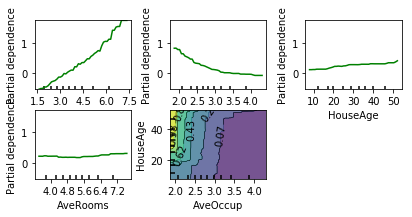

In [39]:
features = [0, 5, 1, 2, (5, 1)]
fig, axs = plot_partial_dependence(clf, X_train, features,
                                   feature_names=names,
                                   n_jobs=3, grid_resolution=50)